# NLP Project
## Sentiment Analysis 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv('../dataset/final/train.csv')
df_test = pd.read_csv('../dataset/final/test.csv')
df_val = pd.read_csv('../dataset/final/val.csv')

In [ ]:
dataframes = [df_train, df_val, df_test]
df_concat = pd.concat(dataframes)
len(df_concat)

8872

In [ ]:
def replaceStarBy0or1(data):
    data['y'] = data['y'].replace([[1,2],[3,4,5]],[0,1])
    return data

In [ ]:
# def replaceStarBy0or1(data):
#     data['y'] = data['y'].replace([[1,2,3],[4,5]],[0,1])
#     return data

In [ ]:
df_concat = replaceStarBy0or1(df_concat)

In [ ]:
df_concat.y.value_counts()

1    8467
0     405
Name: y, dtype: int64

In [ ]:
X, y = df_concat['x'], df_concat['y']

In [ ]:
X

0       Wonderful read. Great, unique perspective on s...
1       A Demotivational and Very Motivational Book. B...
2       Most recommended book of 2012 for me. I've gif...
3       Gladwell always a must read. Very easy reading...
4       Excellent read. Great book. Very thought provo...
                              ...                        
1060                                           Good. Good
1061    Mesmerizing!. I had purchased this book some t...
1062    It's not just luck...or brains for that matter...
1063    Excellent book. Would highly recommend.. Excel...
1064    Great book!. What a wonderfully insightful boo...
Name: x, Length: 8872, dtype: object

In [ ]:
X.shape

(8872,)

In [ ]:
y.shape

(8872,)

In [ ]:
X_array_docs = X.values 

In [ ]:
len(X_array_docs)

8872

In [ ]:
X_array_docs

array(['Wonderful read. Great, unique perspective on success. I do worry though that it might make crazy parents even crazier raising their kids.',
       'A Demotivational and Very Motivational Book. Before I purchased this book, I read many reviews saying that it was not motivational and yet it was motivational, which definitely confused me. I see now after completing this book what they were meaning. Sometimes success is just pure luck, but there is no success without extremely hard work. I very much recommend this book to those looking to be motivated in a very unique and "outside-the-box" way of thinking',
       'Most recommended book of 2012 for me. I\'ve gifted this book so many times over the past several months. It\'s a quick read, detailed, yet not overwhelming. Kept telling people, "Wait to you read the part about ____."',
       ...,
       "It's not just luck...or brains for that matter!. Malcolm Gladwell has done it again! In Outliers, he combines culture context, behavi

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1060    1
1061    1
1062    1
1063    1
1064    1
Name: y, Length: 8872, dtype: int64

### Vocabulário: Todas as palavras que ocorrem no texto, sem repetições

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# vectorizer = CountVectorizer(max_features=50)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(X_array_docs)

In [ ]:
len(vectorizer.get_feature_names())

10330

### Retorna o vocabulário

In [ ]:
vectorizer.get_feature_names()

['000',
 '001',
 '00am',
 '10',
 '100',
 '1000',
 '10000',
 '10000hrs',
 '101',
 '102',
 '10k',
 '10th',
 '11',
 '110',
 '118',
 '119',
 '11th',
 '12',
 '120',
 '125',
 '12s',
 '12th',
 '13',
 '130',
 '1301',
 '135',
 '13yr',
 '14',
 '15',
 '150',
 '1518',
 '155',
 '156',
 '16',
 '160',
 '165',
 '168',
 '17',
 '17th',
 '18',
 '180',
 '1800',
 '1800s',
 '1880s',
 '1890',
 '19',
 '1930s',
 '1950',
 '1950s',
 '1952',
 '1953',
 '1955',
 '1957',
 '1960',
 '1963',
 '1967',
 '1977',
 '1984',
 '1992',
 '1995',
 '19th',
 '1st',
 '20',
 '200',
 '2005',
 '2008',
 '2009',
 '2011',
 '2012',
 '2014',
 '2016',
 '2018',
 '2019',
 '2020',
 '2021',
 '20th',
 '210',
 '21st',
 '22',
 '220',
 '23',
 '24',
 '245',
 '24hours',
 '24hrs',
 '25',
 '25x',
 '26',
 '26th',
 '27',
 '270',
 '28',
 '285',
 '28th',
 '2months',
 '2nd',
 '30',
 '300',
 '3000',
 '3012',
 '30am',
 '30s',
 '30sec',
 '30th',
 '31',
 '34',
 '360',
 '3rd',
 '3rds',
 '40',
 '400',
 '46',
 '49',
 '4hours',
 '4th',
 '4thyo',
 '50',
 '5000',
 '50

In [ ]:
bag_of_words

<8872x10330 sparse matrix of type '<class 'numpy.int64'>'
	with 279129 stored elements in Compressed Sparse Row format>

In [ ]:
bag_of_words.shape

(8872, 10330)

### the 10330 number that apeears in the shape method for the bag_of_words represents the number of features that are been used to represent each review in our corpus

In [ ]:
matrix_sparse = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names())
matrix_sparse

000  001  00am  10  100  1000  10000  10000hrs  101  102  ...  zillion  \
0       0    0     0   0    0     0      0         0    0    0  ...        0   
1       0    0     0   0    0     0      0         0    0    0  ...        0   
2       0    0     0   0    0     0      0         0    0    0  ...        0   
3       0    0     0   0    0     0      0         0    0    0  ...        0   
4       0    0     0   0    0     0      0         0    0    0  ...        0   
...   ...  ...   ...  ..  ...   ...    ...       ...  ...  ...  ...      ...   
8867    0    0     0   0    0     0      0         0    0    0  ...        0   
8868    0    0     0   0    0     0      0         0    0    0  ...        0   
8869    0    0     0   0    0     0      0         0    0    0  ...        0   
8870    0    0     0   0    0     0      0         0    0    0  ...        0   
8871    0    0     0   0    0     0      0         0    0    0  ...        0   

      zivica  zone  zones  zooms  ángulo  áreas  él  éxito  útil  
0          0     0      0      0       0      0   0      0     0  
1          0     0      0      0       0      0   0      0     0  
2          0     0      0      0       0      0   0      0     0  
3          0     0      0      0       0      0   0      0     0  
4          0     0      0      0       0      0   0      0     0  
...      ...   ...    ...    ...     ...    ...  ..    ...   ...  
8867       0     0      0      0       0      0   0      0     0  
8868       0     0      0      0       0      0   0      0     0  
8869       0     0      0      0       0      0   0      0     0  
8870       0     0      0      0       0      0   0      0     0  
8871       0     0      0      0       0      0   0      0     0  

[8872 rows x 10330 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test, class_train, class_test = train_test_split(bag_of_words, df_concat.y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(train, class_train)
accuracy = classifier.score(test, class_test)

In [ ]:
accuracy

0.9639314697926059

### Result with max_features = 50: 0.9283137962128043

In [ ]:
def classify_text(corpus, review, sentiment):
    vectorizer = CountVectorizer()
    bag_of_words = vectorizer.fit_transform(corpus[review])
    train, test, class_train, class_test = train_test_split(bag_of_words, corpus[sentiment], random_state=42)
    classifier = RandomForestClassifier(n_estimators=200, random_state=0)
    classifier.fit(train, class_train)
    return classifier.score(test, class_test)

classify_text(df_concat, 'x', 'y')

0.9639314697926059

In [ ]:
%matplotlib inline

In [ ]:
from wordcloud import WordCloud

In [ ]:
X_array_docs[:3]

array(['Wonderful read. Great, unique perspective on success. I do worry though that it might make crazy parents even crazier raising their kids.',
       'A Demotivational and Very Motivational Book. Before I purchased this book, I read many reviews saying that it was not motivational and yet it was motivational, which definitely confused me. I see now after completing this book what they were meaning. Sometimes success is just pure luck, but there is no success without extremely hard work. I very much recommend this book to those looking to be motivated in a very unique and "outside-the-box" way of thinking',
       'Most recommended book of 2012 for me. I\'ve gifted this book so many times over the past several months. It\'s a quick read, detailed, yet not overwhelming. Kept telling people, "Wait to you read the part about ____."'],
      dtype=object)

In [ ]:
import matplotlib.pyplot as plt

### width and height paramteres define where the words are distributed in the figure

In [ ]:

# def generate_wordcloud_sentiment_negative(text, target):
    
#     sentiment_text = text.query("y == 0")

#     all_words = ' '.join([text for text in sentiment_text[target]])

#     wordCloud = WordCloud(width=800, height=500,
#                             max_font_size=110).generate(all_words)

#     plt.figure(figsize=(10,7))
#     plt.imshow(wordCloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.show()

In [ ]:
all_words = ' '.join([text for text in df_concat['x']])

In [ ]:
all_words

'Wonderful read. Great, unique perspective on success. I do worry though that it might make crazy parents even crazier raising their kids. A Demotivational and Very Motivational Book. Before I purchased this book, I read many reviews saying that it was not motivational and yet it was motivational, which definitely confused me. I see now after completing this book what they were meaning. Sometimes success is just pure luck, but there is no success without extremely hard work. I very much recommend this book to those looking to be motivated in a very unique and "outside-the-box" way of thinking Most recommended book of 2012 for me. I\'ve gifted this book so many times over the past several months. It\'s a quick read, detailed, yet not overwhelming. Kept telling people, "Wait to you read the part about ____." Gladwell always a must read. Very easy reading and brings together all the those things you could see but couldn\'t quite put your finger on. Excellent read. Great book. Very thought

In [ ]:

def generate_wordcloud_sentiment(text, target, sentiment):
    
    sentiment_text = text.query("y == " f'{sentiment}')

    all_words = ' '.join([text for text in sentiment_text[target]])

    wordCloud = WordCloud(width=800, height=500,
                            max_font_size=110).generate(all_words)

    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Generating wordcloud with the sengative reviews

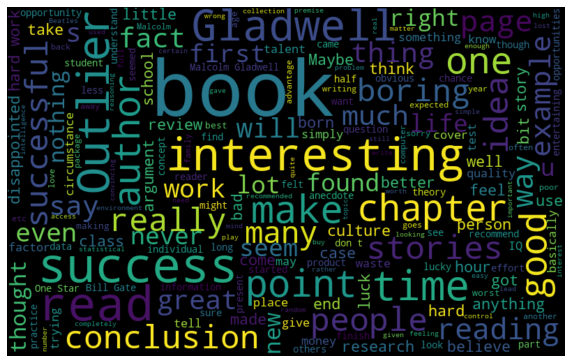

In [ ]:
generate_wordcloud_sentiment(df_concat, 'x', 0)

### Generating wordcloud with the positive reviews

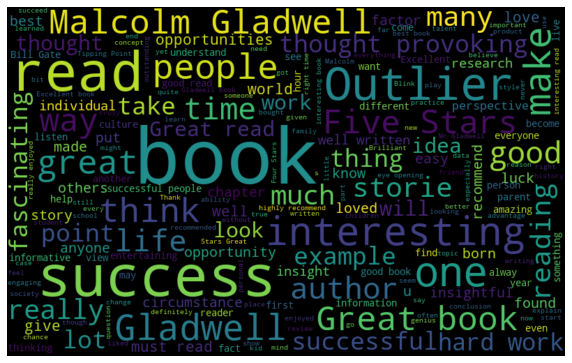

In [ ]:
generate_wordcloud_sentiment(df_concat, 'x', 1)

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\cof2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\cof2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\cof2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\cof2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\cof2\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
# FreqDist should receive a list containing each word from our corpus (our tokens)
# frequence = nltk.FreqDist(X_array_docs)

### Creating a dataframe with the frequences where a column will be the words

In [ ]:
# punctuation

In [ ]:
# punctuation_list

In [ ]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
tokens_corpus = token_space.tokenize(all_words)
frequence = nltk.FreqDist(tokens_corpus)


In [ ]:
df_frequence = pd.DataFrame({"Word": list(frequence.keys()),
                             "Frequence": list(frequence.values())})

In [ ]:
tokens_corpus

['Wonderful',
 'read.',
 'Great,',
 'unique',
 'perspective',
 'on',
 'success.',
 'I',
 'do',
 'worry',
 'though',
 'that',
 'it',
 'might',
 'make',
 'crazy',
 'parents',
 'even',
 'crazier',
 'raising',
 'their',
 'kids.',
 'A',
 'Demotivational',
 'and',
 'Very',
 'Motivational',
 'Book.',
 'Before',
 'I',
 'purchased',
 'this',
 'book,',
 'I',
 'read',
 'many',
 'reviews',
 'saying',
 'that',
 'it',
 'was',
 'not',
 'motivational',
 'and',
 'yet',
 'it',
 'was',
 'motivational,',
 'which',
 'definitely',
 'confused',
 'me.',
 'I',
 'see',
 'now',
 'after',
 'completing',
 'this',
 'book',
 'what',
 'they',
 'were',
 'meaning.',
 'Sometimes',
 'success',
 'is',
 'just',
 'pure',
 'luck,',
 'but',
 'there',
 'is',
 'no',
 'success',
 'without',
 'extremely',
 'hard',
 'work.',
 'I',
 'very',
 'much',
 'recommend',
 'this',
 'book',
 'to',
 'those',
 'looking',
 'to',
 'be',
 'motivated',
 'in',
 'a',
 'very',
 'unique',
 'and',
 '"outside-the-box"',
 'way',
 'of',
 'thinking',
 'Mos

In [ ]:
frequence

FreqDist({'the': 13516, 'and': 11481, 'to': 10267, 'of': 9443, 'a': 8543, 'I': 7459, 'is': 5543, 'book': 5083, 'that': 4917, 'in': 4886, ...})

In [ ]:
len(frequence)

21743

In [ ]:
df_frequence_largest = df_frequence.nlargest(columns = "Frequence", n = 10)

### Dictionary size: 21743

In [ ]:
import seaborn as sns

In [ ]:
def plot_high_frequence_words(dataset, review_col, number_of_words):
          
    all_words = ' '.join([dataset for dataset in dataset[review_col]])
    # print(dataset['processing1'][:2])
    tokens_corpus = token_space.tokenize(all_words)
    frequence = nltk.FreqDist(tokens_corpus)
    df_frequence = pd.DataFrame({"Word": list(frequence.keys()),
                             "Frequence": list(frequence.values())})

    df_frequence_largest = df_frequence.nlargest(columns = "Frequence", n = number_of_words)

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequence_largest, x = "Word", y = "Frequence", color ='orange')
    ax.set(ylabel = "Counting")
    plt.show()

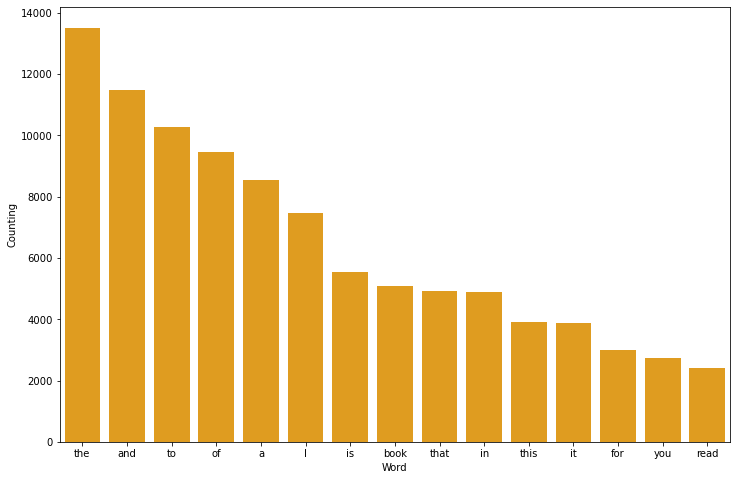

In [ ]:
plot_high_frequence_words(df_concat, 'x', 15)

### Pre-processing data

In [ ]:
irrelevant_words = nltk.corpus.stopwords.words("english")
irrelevant_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### removing stop words

In [ ]:
processed_review = list()

for review in df_concat.x:
    new_review = list()
    text_review = token_space.tokenize(review)
    for word in text_review:
        if word not in irrelevant_words:
            new_review.append(word)

    processed_review.append(' '.join(new_review))

df_concat['processing1'] = processed_review

### processing1: Remove stop words in reviews

In [ ]:
df_concat.head()

x  y  \
0  Wonderful read. Great, unique perspective on s...  1   
1  A Demotivational and Very Motivational Book. B...  1   
2  Most recommended book of 2012 for me. I've gif...  1   
3  Gladwell always a must read. Very easy reading...  1   
4  Excellent read. Great book. Very thought provo...  1   

                                         processing1  
0  Wonderful read. Great, unique perspective succ...  
1  A Demotivational Very Motivational Book. Befor...  
2  Most recommended book 2012 me. I've gifted boo...  
3  Gladwell always must read. Very easy reading b...  
4  Excellent read. Great book. Very thought provo...

### Accuracy withou any pre=processing: 0.9639314697926059

In [ ]:
classify_text(df_concat,  'x', 'y')

0.9639314697926059

### Accuracy after pre-processing 1 (removing stop words): 0.9643823264201984

In [ ]:
classify_text(df_concat,  'processing1', 'y')

0.9643823264201984

In [ ]:
print(df_concat[:1].x)

0    Wonderful read. Great, unique perspective on s...
Name: x, dtype: object


In [ ]:
print(df_concat[:1].processing1)

0    Wonderful read. Great, unique perspective succ...
Name: processing1, dtype: object


### Wordcloud with negative reviews after pre-processing 1

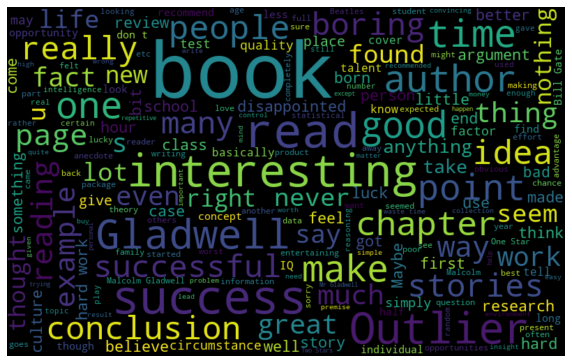

In [ ]:
generate_wordcloud_sentiment(df_concat, 'processing1', 0)

### Wordcloud with positive reviews after pre-processing 1

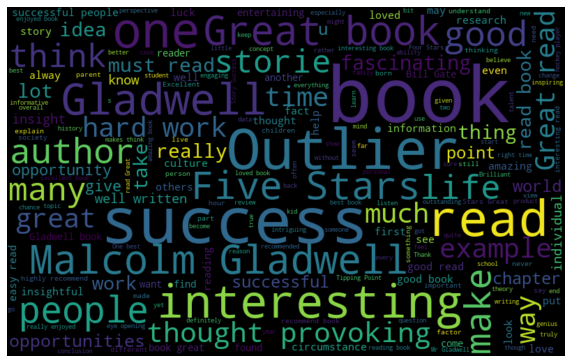

In [ ]:
generate_wordcloud_sentiment(df_concat, 'processing1', 1)

### Plotting graph with high frequent words after pre processing 1

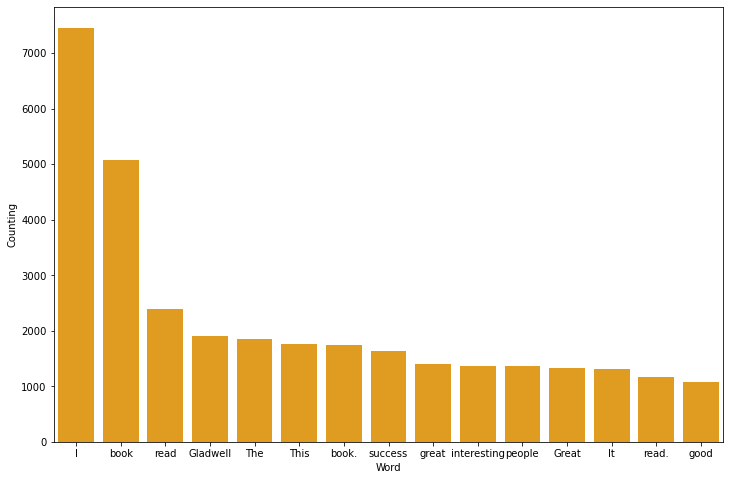

In [ ]:
plot_high_frequence_words(df_concat, 'processing1', 15)

### Processing 2: Removing puncts

In [ ]:
token_punctuation = tokenize.WordPunctTokenizer()

In [ ]:
from string import punctuation

punctuation_ = list()
for ponto in punctuation:
    punctuation_.append(ponto)

punctuation__stopwords = punctuation_ + irrelevant_words

processed_review_remove_puncts = list()
for opiniao in df_concat['processing1']:
    new_review_without_puncts = list()
    words_text = token_punctuation.tokenize(opiniao)
    for word in words_text:
        if word not in punctuation__stopwords:
            new_review_without_puncts.append(word)
    processed_review_remove_puncts.append(' '.join(new_review_without_puncts))

df_concat['processing2'] = processed_review_remove_puncts


In [ ]:
df_concat

x  y  \
0     Wonderful read. Great, unique perspective on s...  1   
1     A Demotivational and Very Motivational Book. B...  1   
2     Most recommended book of 2012 for me. I've gif...  1   
3     Gladwell always a must read. Very easy reading...  1   
4     Excellent read. Great book. Very thought provo...  1   
...                                                 ... ..   
1060                                         Good. Good  1   
1061  Mesmerizing!. I had purchased this book some t...  1   
1062  It's not just luck...or brains for that matter...  1   
1063  Excellent book. Would highly recommend.. Excel...  1   
1064  Great book!. What a wonderfully insightful boo...  1   

                                            processing1  \
0     Wonderful read. Great, unique perspective succ...   
1     A Demotivational Very Motivational Book. Befor...   
2     Most recommended book 2012 me. I've gifted boo...   
3     Gladwell always must read. Very easy reading b...   
4     Excellent read. Great book. Very thought provo...   
...                                                 ...   
1060                                         Good. Good   
1061  Mesmerizing!. I purchased book time ago and, p...   
1062  It's luck...or brains matter!. Malcolm Gladwel...   
1063  Excellent book. Would highly recommend.. Excel...   
1064  Great book!. What wonderfully insightful book!...   

                                            processing2  
0     Wonderful read Great unique perspective succes...  
1     A Demotivational Very Motivational Book Before...  
2     Most recommended book 2012 I gifted book many ...  
3     Gladwell always must read Very easy reading br...  
4     Excellent read Great book Very thought provoki...  
...                                                 ...  
1060                                          Good Good  
1061  Mesmerizing !. I purchased book time ago put a...  
1062  It luck ... brains matter !. Malcolm Gladwell ...  
1063  Excellent book Would highly recommend .. Excel...  
1064  Great book !. What wonderfully insightful book...  

[8872 rows x 4 columns]

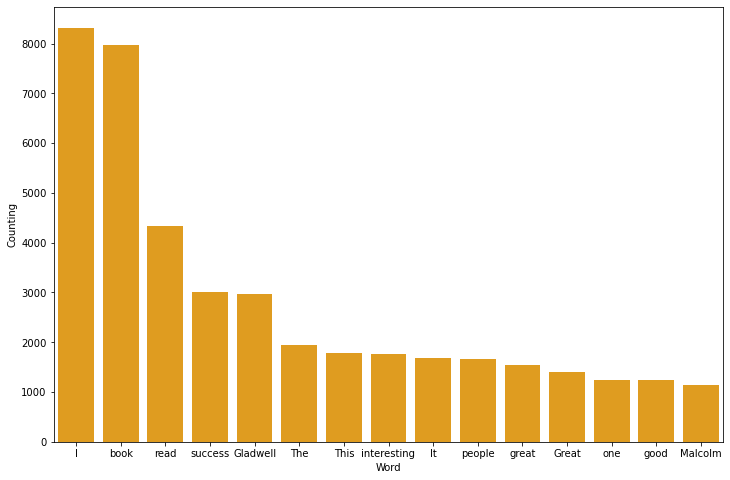

In [ ]:
plot_high_frequence_words(df_concat, 'processing2', 15)

In [ ]:
df_concat['processing1'][0]

0    Wonderful read. Great, unique perspective succ...
0    One interesting books I've ever read. Just fin...
0    Outliers. Interesting facts keep mind opportun...
Name: processing1, dtype: object

In [ ]:
df_concat['processing2'][0]

0    Wonderful read Great unique perspective succes...
0    One interesting books I ever read Just finishe...
0    Outliers Interesting facts keep mind opportuni...
Name: processing2, dtype: object

### Accuracy after removing puncts: 0.9639314697926059

In [ ]:
classify_text(df_concat,  'processing2', 'y')

0.9639314697926059

### Processing 3: Transforming reviews to lower case

In [ ]:
from string import punctuation

punctuation_ = list()
for ponto in punctuation:
    punctuation_.append(ponto)

punctuation__stopwords = punctuation_ + irrelevant_words

processed_review_remove_puncts = list()
for opiniao in df_concat['processing2']:
    new_review_without_puncts = list()
    opiniao = opiniao.lower()
    words_text = token_punctuation.tokenize(opiniao)
    for word in words_text:
        if word not in punctuation__stopwords:
            new_review_without_puncts.append(word)
    processed_review_remove_puncts.append(' '.join(new_review_without_puncts))

df_concat['processing3'] = processed_review_remove_puncts


In [ ]:
df_concat.head(5)

x  y  \
0  Wonderful read. Great, unique perspective on s...  1   
1  A Demotivational and Very Motivational Book. B...  1   
2  Most recommended book of 2012 for me. I've gif...  1   
3  Gladwell always a must read. Very easy reading...  1   
4  Excellent read. Great book. Very thought provo...  1   

                                         processing1  \
0  Wonderful read. Great, unique perspective succ...   
1  A Demotivational Very Motivational Book. Befor...   
2  Most recommended book 2012 me. I've gifted boo...   
3  Gladwell always must read. Very easy reading b...   
4  Excellent read. Great book. Very thought provo...   

                                         processing2  \
0  Wonderful read Great unique perspective succes...   
1  A Demotivational Very Motivational Book Before...   
2  Most recommended book 2012 I gifted book many ...   
3  Gladwell always must read Very easy reading br...   
4  Excellent read Great book Very thought provoki...   

                                         processing3  
0  wonderful read great unique perspective succes...  
1  demotivational motivational book purchased boo...  
2  recommended book 2012 gifted book many times p...  
3  gladwell always must read easy reading brings ...  
4  excellent read great book thought provoking ga...

### Accuracy after processing 3 (transforming to lower case): 0.9657348963029756

In [ ]:
classify_text(df_concat,  'processing3', 'y')

0.9657348963029756

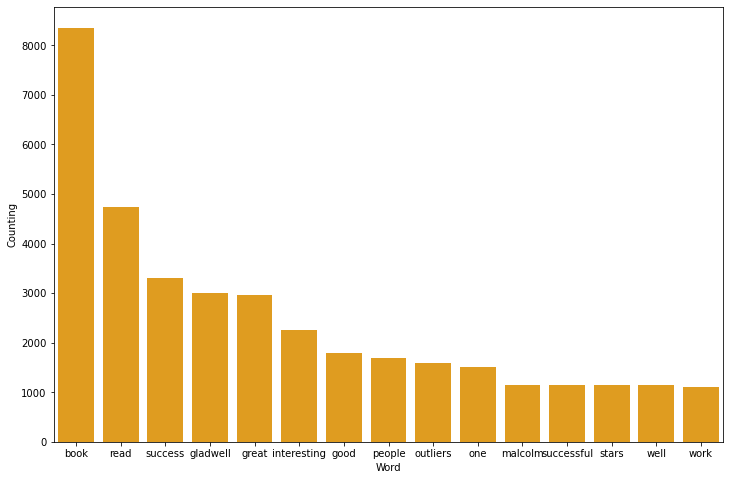

In [ ]:
plot_high_frequence_words(df_concat, 'processing3', 15)

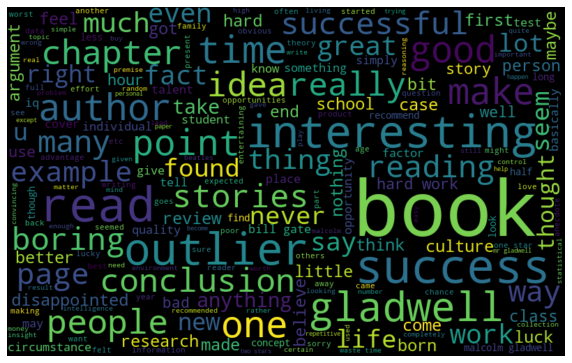

In [ ]:
generate_wordcloud_sentiment(df_concat, 'processing3', 0)

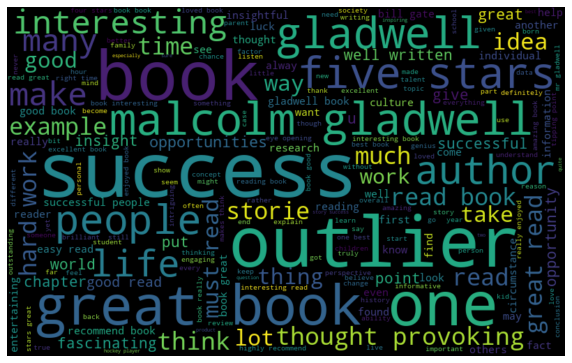

In [ ]:
generate_wordcloud_sentiment(df_concat, 'processing3', 1)

### Processing 4: Stemmer

In [ ]:
stemmer = nltk.PorterStemmer()

In [ ]:
from string import punctuation

punctuation_ = list()
for ponto in punctuation:
    punctuation_.append(ponto)

punctuation__stopwords = punctuation_ + irrelevant_words

processed_review_remove_puncts = list()
for opiniao in df_concat['processing3']:
    new_review_without_puncts = list()
    words_text = token_punctuation.tokenize(opiniao)
    for word in words_text:
        if word not in punctuation__stopwords:
            new_review_without_puncts.append(stemmer.stem(word))
    processed_review_remove_puncts.append(' '.join(new_review_without_puncts))

df_concat['processing4'] = processed_review_remove_puncts


<!-- ### Accuracy after Processing 4 stemming: 0.9337240757439135  -->

In [ ]:
classify_text(df_concat, 'processing4', 'y')

In [ ]:
df_concat['processing4'].head(5)

In [ ]:
generate_wordcloud_sentiment(df_concat, 'processing4', 0)

In [ ]:
generate_wordcloud_sentiment(df_concat, 'processing4', 1)

In [ ]:
plot_high_frequence_words(df_concat, 'processing4', 15)

### Processing 5: Lemmatizer

In [ ]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

In [ ]:
from string import punctuation

punctuation_ = list()
for ponto in punctuation:
    punctuation_.append(ponto)

punctuation__stopwords = punctuation_ + irrelevant_words

processed_review_remove_puncts = list()
for opiniao in df_concat['processing3']:
    new_review_without_puncts = list()
    words_text = token_punctuation.tokenize(opiniao)
    for word in words_text:
        if word not in punctuation__stopwords:
            new_review_without_puncts.append(lemmatizer.lemmatize(word))
    processed_review_remove_puncts.append(' '.join(new_review_without_puncts))

df_concat['processing5'] = processed_review_remove_puncts


### Accuracy after Processing 5 lemmatizer: 0.9661857529305681 

In [ ]:
classify_text(df_concat, 'processing5', 'y')

0.9661857529305681

In [ ]:
df_concat['processing5'].head(5)

0    wonderful read great unique perspective succes...
1    demotivational motivational book purchased boo...
2    recommended book 2012 gifted book many time pa...
3    gladwell always must read easy reading brings ...
4    excellent read great book thought provoking ga...
Name: processing5, dtype: object

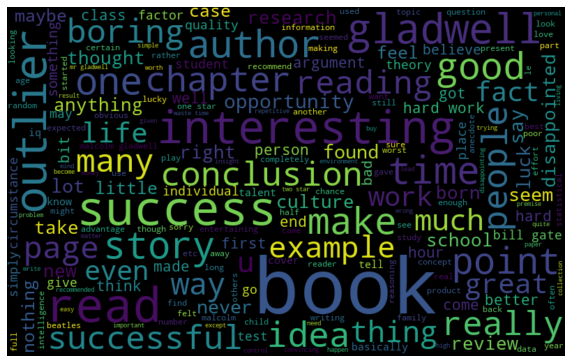

In [ ]:
generate_wordcloud_sentiment(df_concat, 'processing5', 0)

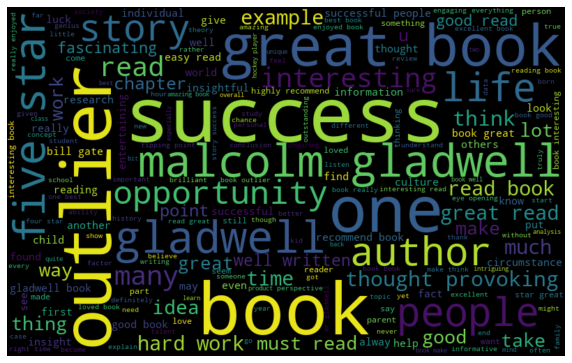

In [ ]:
generate_wordcloud_sentiment(df_concat, 'processing5', 1)

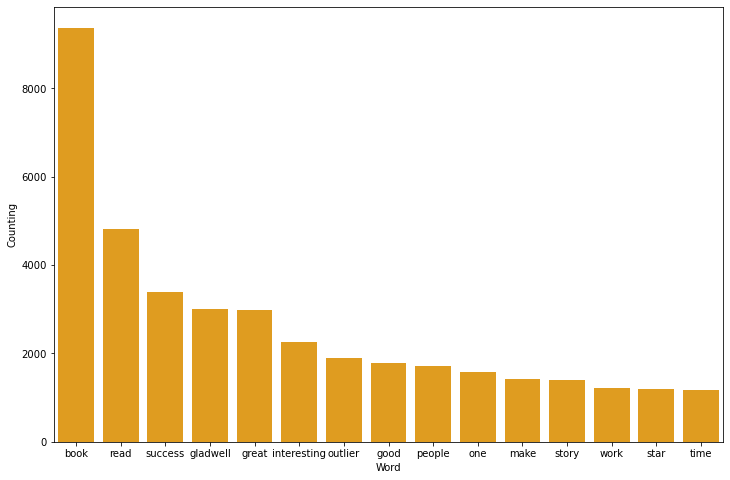

In [ ]:
plot_high_frequence_words(df_concat, 'processing5', 15)

In [ ]:
df_concat.head(5)

x  y  \
0  Wonderful read. Great, unique perspective on s...  1   
1  A Demotivational and Very Motivational Book. B...  1   
2  Most recommended book of 2012 for me. I've gif...  1   
3  Gladwell always a must read. Very easy reading...  1   
4  Excellent read. Great book. Very thought provo...  1   

                                         processing1  \
0  Wonderful read. Great, unique perspective succ...   
1  A Demotivational Very Motivational Book. Befor...   
2  Most recommended book 2012 me. I've gifted boo...   
3  Gladwell always must read. Very easy reading b...   
4  Excellent read. Great book. Very thought provo...   

                                         processing2  \
0  Wonderful read Great unique perspective succes...   
1  A Demotivational Very Motivational Book Before...   
2  Most recommended book 2012 I gifted book many ...   
3  Gladwell always must read Very easy reading br...   
4  Excellent read Great book Very thought provoki...   

                                         processing3  \
0  wonderful read great unique perspective succes...   
1  demotivational motivational book purchased boo...   
2  recommended book 2012 gifted book many times p...   
3  gladwell always must read easy reading brings ...   
4  excellent read great book thought provoking ga...   

                                         processing5  
0  wonderful read great unique perspective succes...  
1  demotivational motivational book purchased boo...  
2  recommended book 2012 gifted book many time pa...  
3  gladwell always must read easy reading brings ...  
4  excellent read great book thought provoking ga...